In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-neural-network-dnn-regressor/tensorflow2/dnn-model-with-scaling-encoding-dropout/1/Kaggle_BagPack_Prediction_NN.Dr.AmobiOnovo.ipynb


# ==============================================
# 📦 Installing and importing required libraries
# ==============================================

In [ ]:
%pip install scikeras
%pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 92.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

# ===================================
# 📥 Loading the Kaggle Datasets
# ===================================

In [ ]:
import os

# List all files in the dataset folder
dataset_path = '/kaggle/input/dnn-datasets'
print(os.listdir(dataset_path))

['sample_submission.csv', 'train.csv', 'test.csv', 'training_extra.csv']


In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv(f'{dataset_path}/train.csv')
test_df = pd.read_csv(f'{dataset_path}/test.csv')
train_extra_df = pd.read_csv(f'{dataset_path}/training_extra.csv')
sample_submission = pd.read_csv(f'{dataset_path}/sample_submission.csv')

# View the first few rows of the training set
train_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [ ]:
train_extra_df.sample(10)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
3679019,4179019,Under Armour,Polyester,Small,10.0,Yes,No,Tote,Green,26.336741,130.67577
3473220,3973220,Adidas,Polyester,Medium,3.0,No,Yes,Tote,Green,11.901323,63.98104
1265630,1765630,Nike,Nylon,Large,3.0,Yes,Yes,Tote,Green,26.867873,63.95922
1127776,1627776,Adidas,Canvas,Medium,4.0,Yes,Yes,Tote,Red,23.579623,17.81074
1370138,1870138,Nike,Leather,Large,8.0,Yes,No,Backpack,Black,12.764997,36.40605
1102332,1602332,Under Armour,Polyester,Large,1.0,Yes,Yes,NaN,Pink,13.114909,131.84512
3228431,3728431,Under Armour,Polyester,Large,6.0,No,Yes,Messenger,Black,27.762484,141.86525
2597989,3097989,Nike,NaN,Small,9.0,Yes,No,Tote,Green,9.146329,72.15891
495515,995515,Jansport,Nylon,Large,2.0,No,Yes,Backpack,Black,24.845371,123.00024
200335,700335,Jansport,Nylon,Large,10.0,Yes,No,Messenger,Pink,14.611160,42.90806


# ===================================
# 🧹 Data Cleaning and EDA
# ===================================

In [ ]:
# Check missing values
print(train_df.isnull().sum())

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64


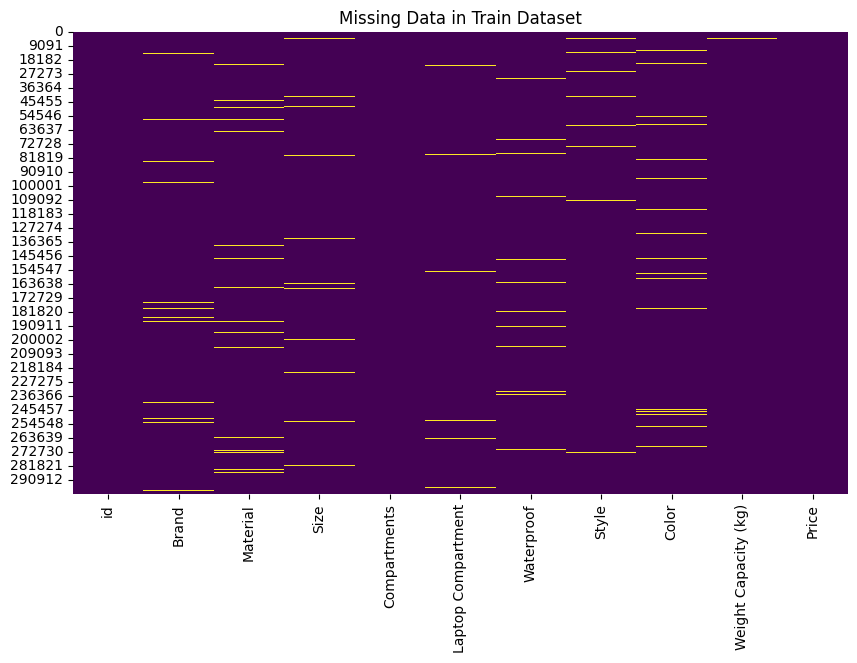

In [ ]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Train Dataset')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


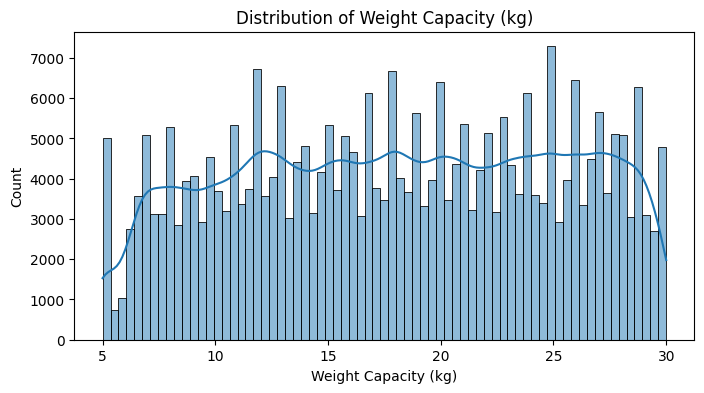

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


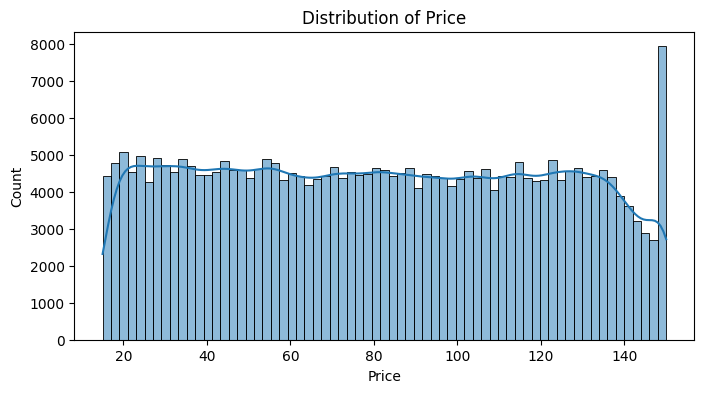

In [ ]:
# Numerical feature distributions
numerical_features = ['Weight Capacity (kg)', 'Price']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
# Identifying categorical and numerical columns
categorical_features = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
numerical_features = ['Compartments', 'Weight Capacity (kg)']

In [ ]:
# Describe categorical variables
categorical_description = train_df[categorical_features].describe(include='object')
print(categorical_description)

         Brand   Material    Size Laptop Compartment Waterproof      Style  \
count   290295     291653  293405             292556     292950     292030   
unique       5          4       3                  2          2          3   
top     Adidas  Polyester  Medium                Yes        Yes  Messenger   
freq     60077      79630  101906             148342     148077     100031   

         Color  
count   290050  
unique       6  
top       Pink  
freq     51690  


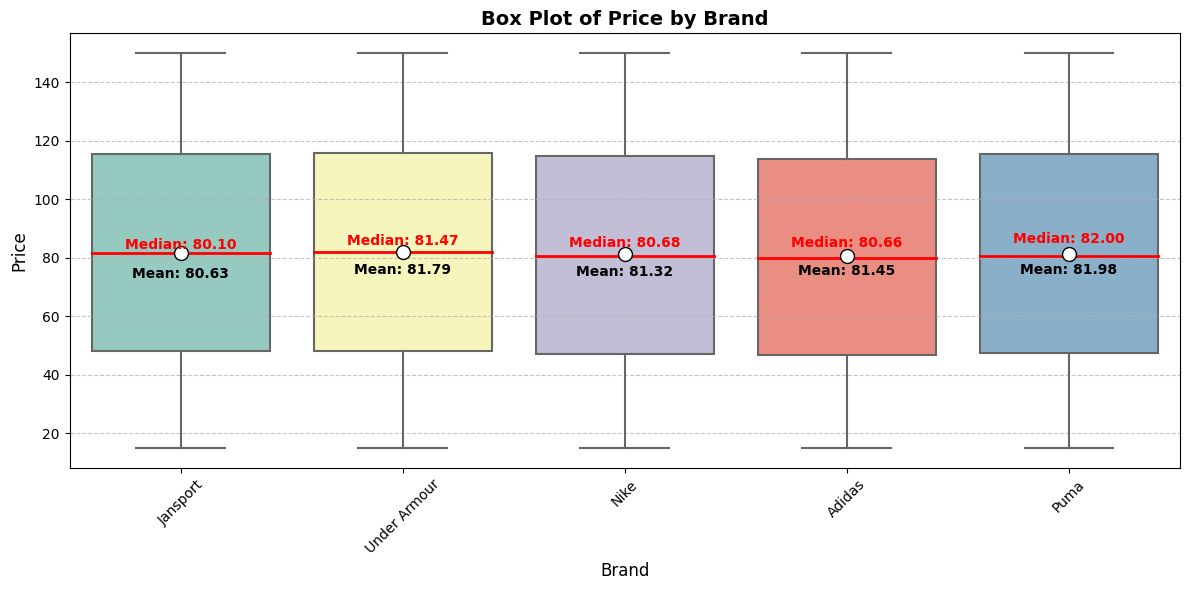

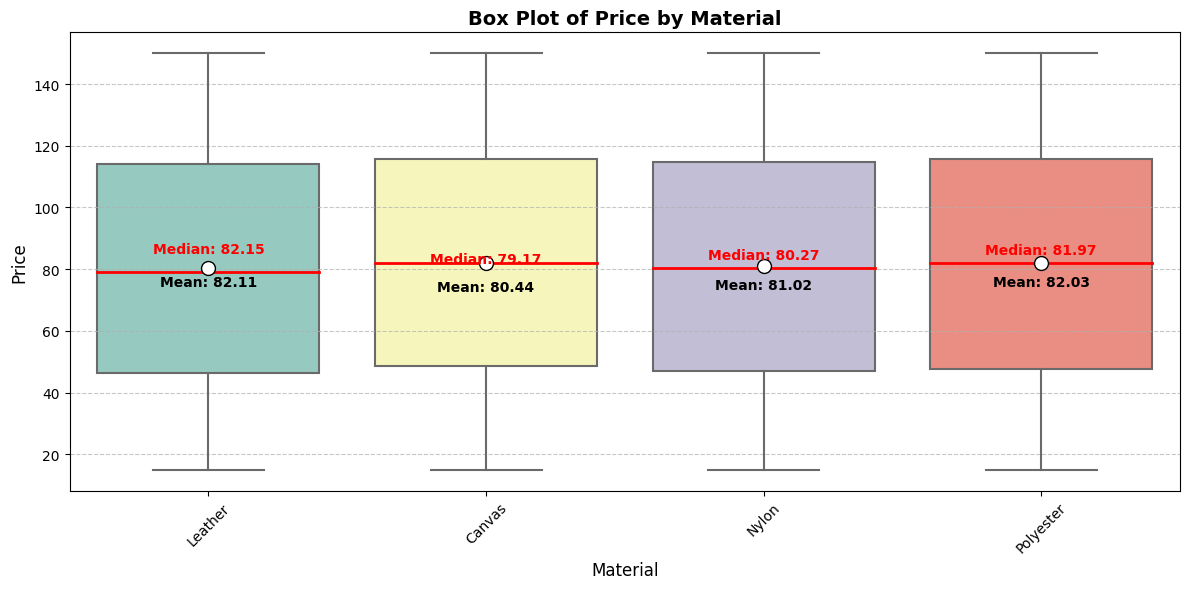

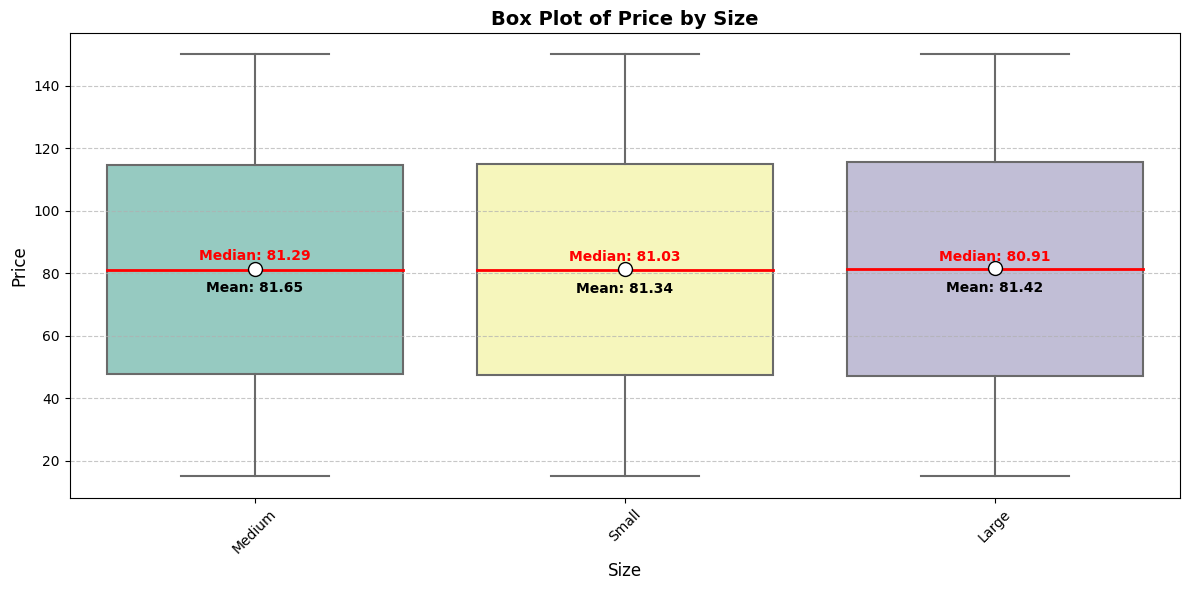

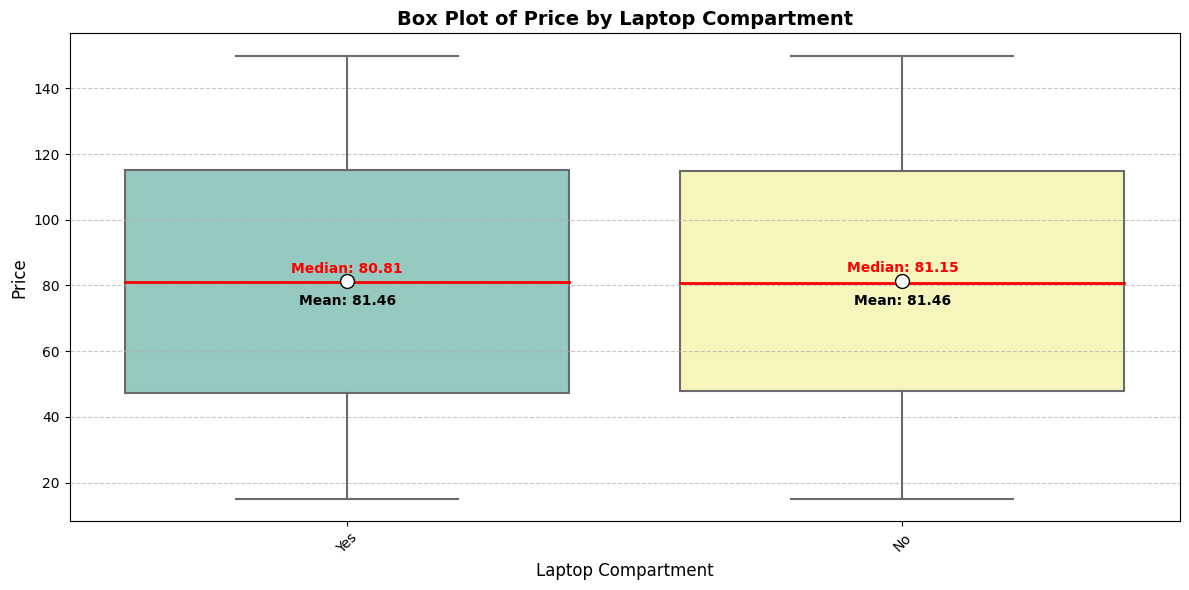

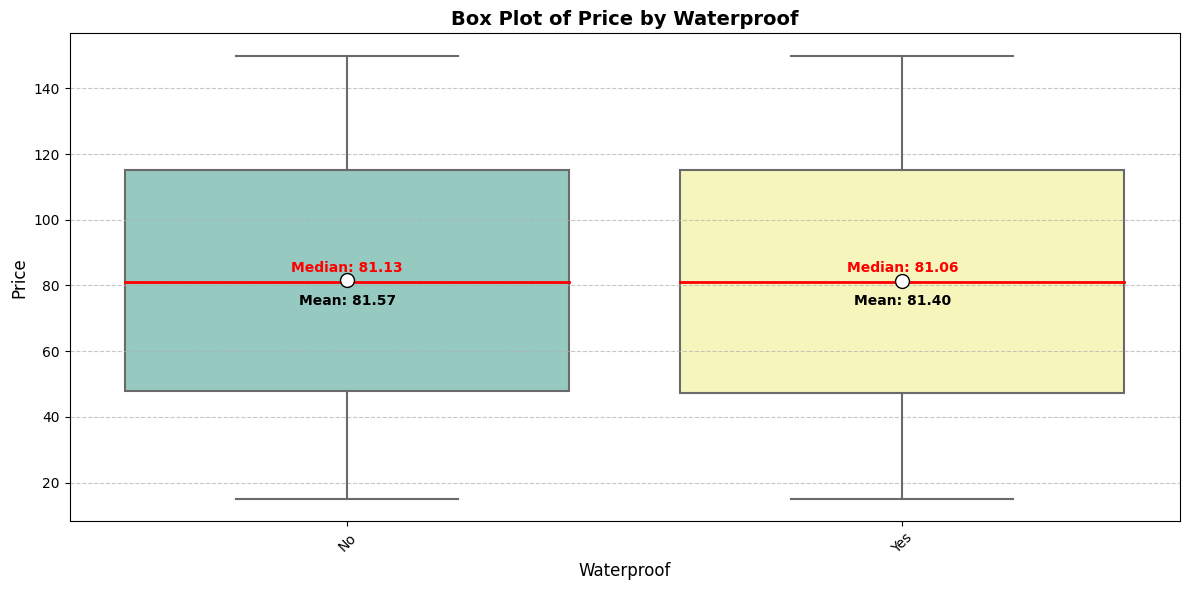

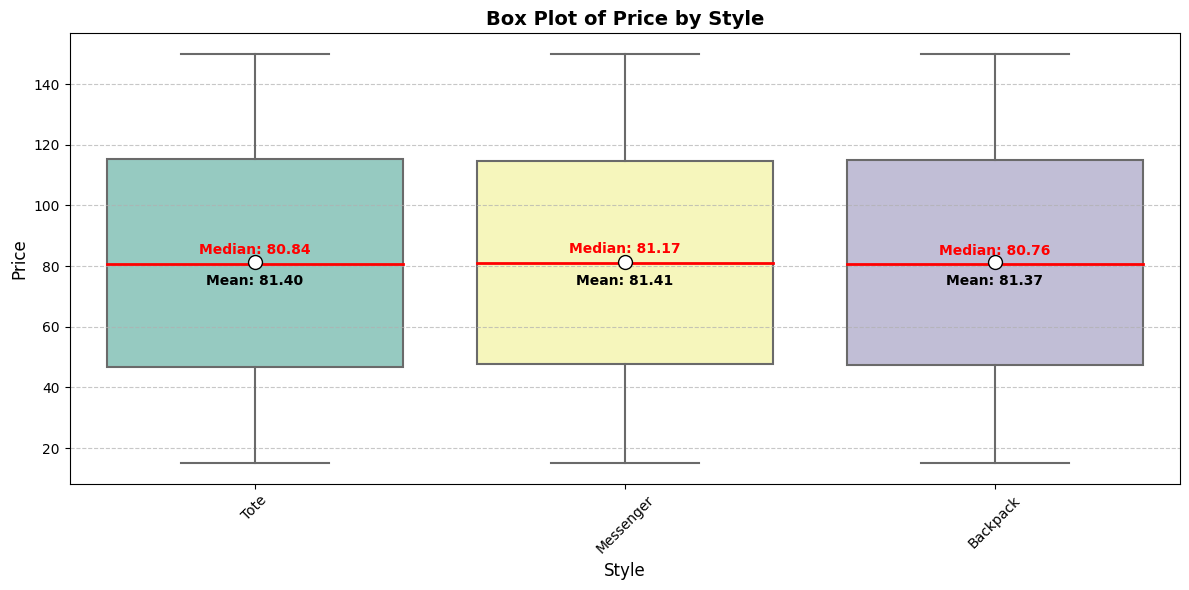

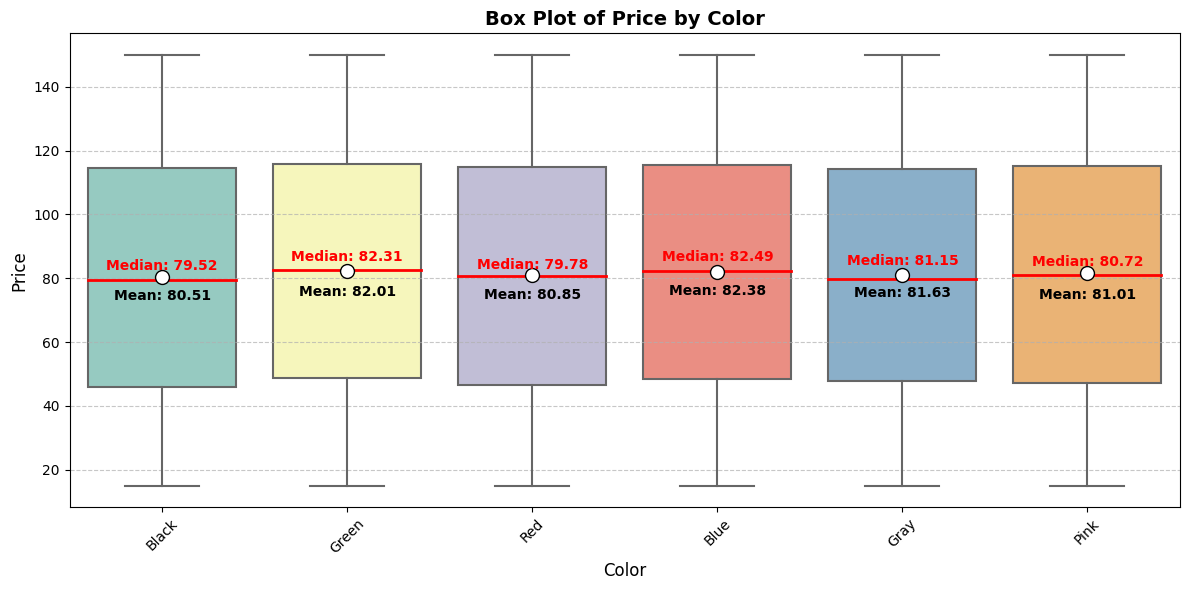

In [ ]:
# Plot box plots for each categorical feature with median and mean values
for feature in categorical_features:
    plt.figure(figsize=(12, 6))

    # Create the box plot with mean and median markers
    ax = sns.boxplot(
        x=feature,
        y='Price',
        data=train_df,
        palette='Set3',
        showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": "10"},
        medianprops={"color": "red", "linewidth": 2}
    )

    # Calculate and annotate median values on the plot
    medians = train_df.groupby(feature)['Price'].median()
    for xtick, median_value in enumerate(medians):
        ax.text(
            xtick,
            median_value + 0.02 * train_df['Price'].max(),  # Slightly above the median line for visibility
            f"Median: {median_value:.2f}",
            horizontalalignment='center',
            size='medium',
            color='red',
            weight='semibold'
        )

    # Calculate and annotate mean values on the plot
    means = train_df.groupby(feature)['Price'].mean()
    for xtick, mean_value in enumerate(means):
        ax.text(
            xtick,
            mean_value - 0.05 * train_df['Price'].max(),  # Slightly below the mean marker
            f"Mean: {mean_value:.2f}",
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='semibold'
        )

    # Plot formatting
    plt.title(f'Box Plot of Price by {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
# Describe numerical variables
numerical_description = train_df[numerical_features].describe()
print(numerical_description)

        Compartments  Weight Capacity (kg)
count  300000.000000         299862.000000
mean        5.443590             18.029994
std         2.890766              6.966914
min         1.000000              5.000000
25%         3.000000             12.097867
50%         5.000000             18.068614
75%         8.000000             24.002375
max        10.000000             30.000000


# ===================================
# 🧬 Data Preprocessing Pipeline
# ===================================

In [ ]:
# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
# Full preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Compartments', 'Weight Capacity (kg)']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Brand', 'Material', 'Size',
                                  'Laptop Compartment', 'Waterproof', 'Style',
                                  'Color'])])

# ===================================
# Metric: RMSE
# ===================================

In [ ]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# =======================================
# 🧠 Deep Neural Network Model
# =======================================

In [ ]:
# Split training data into features and target
X = train_df.drop(columns=['Price', 'id'])
y = train_df['Price']

In [ ]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(test_df.drop(columns=['id']))

In [ ]:
# ------------------------------
def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])
    return model

In [ ]:
# Initialize the model
model = build_model(input_dim=X_train_processed.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    X_train_processed,
    y_train,
    validation_data=(X_val_processed, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 1845.4642 - rmse: 41.7144 - val_loss: 1521.6061 - val_rmse: 38.8812
Epoch 2/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 1557.4580 - rmse: 39.3338 - val_loss: 1516.1039 - val_rmse: 38.8136
Epoch 3/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 1550.4259 - rmse: 39.2387 - val_loss: 1518.7426 - val_rmse: 38.8473
Epoch 4/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1552.8336 - rmse: 39.2717 - val_loss: 1528.3799 - val_rmse: 38.9702
Epoch 5/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 1549.2626 - rmse: 39.2266 - val_loss: 1516.8588 - val_rmse: 38.8219
Epoch 6/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1546.1129 - rmse: 39.1878 - val_loss: 1520.2472 - val_rmse: 38.8640
Epoch 7/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 1545.3188 - rmse: 39.1818 - val_loss: 1527.1058 - val_rmse: 38.9526
Epoch 8/100
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 1547.2228 - 

In [ ]:
# Model Evaluation
# ------------------------------
val_loss, val_rmse = model.evaluate(X_val_processed, y_val, verbose=1)
print(f"Validation RMSE: {val_rmse:.4f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1512.7283 - rmse: 38.7705
Validation RMSE: 38.8078


In [ ]:
# Predictions on the test set
test_predictions = model.predict(X_test_processed).flatten()

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


# ===================================
# 📈 Ploting Training & Validation Loss
# ===================================

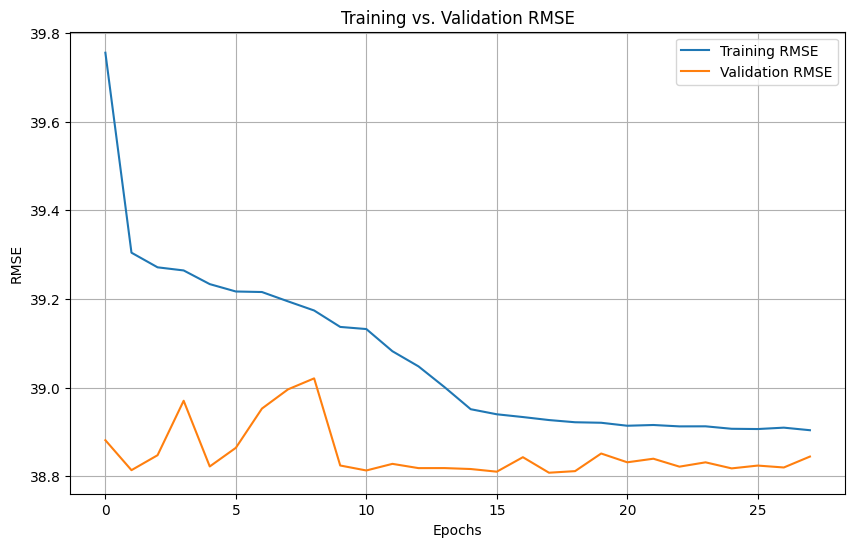

In [ ]:
# Training and Validation RMSE Plot
# ------------------------------
plt.figure(figsize=(10, 6))
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training vs. Validation RMSE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Submission File Preparation
# ------------------------------
submission = pd.DataFrame({
    'id': test_df['id'],
    'Price': test_predictions
})
submission.to_csv('submission_kaggle.csv', index=False)
print("Submission file saved as 'submission_kaggle.csv'.")

Submission file saved as 'submission_kaggle.csv'.


# Distribution of Predicted Prices

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


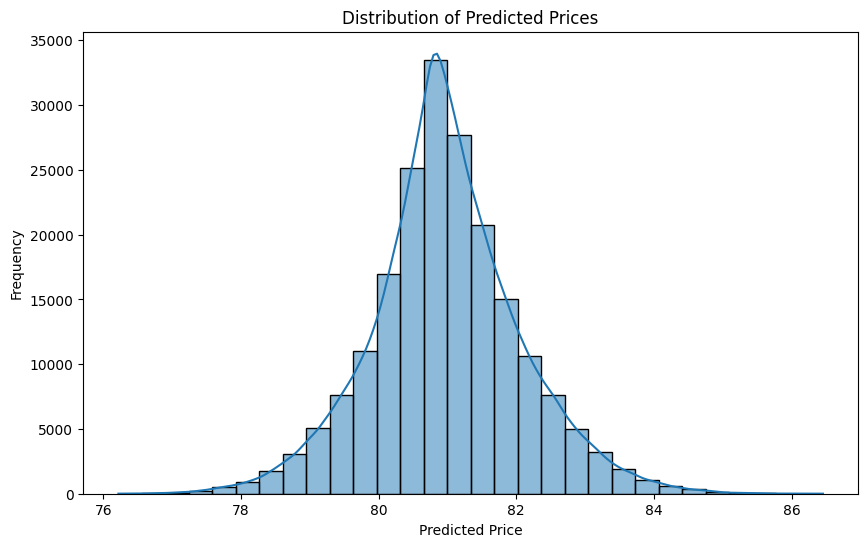

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(test_predictions, bins=30, kde=True)
plt.title("Distribution of Predicted Prices")
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.show()